In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Set the name of the image in the directory to be read
image_name = "HeLa WT 23pN vinculin n2.tif"

img = cv2.imread(image_name)

# If the image is in RGB format, we need to convert to greyscale
# We can do this by either selecting one of the image channels, or 
# using opencv's convert to greyscale function

img2 = img[:, :, 1]

In [11]:
# First step is to apply gaussian blurring
blur = cv2.bilateralFilter(img2, 9, 75, 75)

Text(0, 0.5, 'Count')

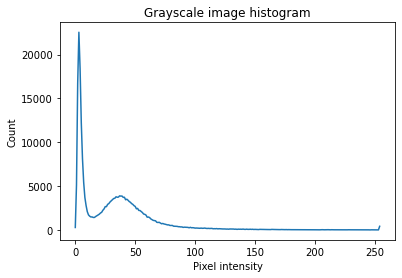

In [12]:
# Next we will apply global thresholding based on the histogram of the data
counts, vals = np.histogram(img2, bins=range(256))

plt.plot(range(0, 255), counts)
plt.title('Grayscale image histogram')
plt.xlabel('Pixel intensity')
plt.ylabel('Count')

In [13]:
# User should input the desired intensity range the focal adhesions will be calculated on
# The range is from 0 to 255


lower_intensity = 80
upper_intensity = 255

# Applying our global threshold
__, thresh = cv2.threshold(blur, lower_intensity, upper_intensity, cv2.THRESH_BINARY)

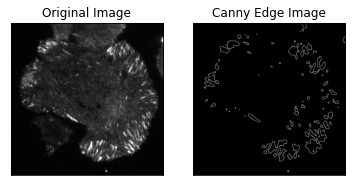

In [15]:
# First input is image
# Second input is minval 
# Third argument is maxvalue
# Fourth argument is aperture_size, aka size of
# the Sobel kernel used for finding image gradients 
# aka edge detection. Default is 3
# Last argument is L2gradient which specifies the equation for finding gradient magnitude
# By default, it is false


# User should input the desired intensity range the focal adhesions will be calculated on
# The range is from 0 to 255


lower_intensity = 80
upper_intensity = 255

edges = cv2.Canny(thresh, lower_intensity, upper_intensity)

# Now we want to plot the original image and the image using the canny edge detection method

plt.subplot(121),plt.imshow(img2,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Canny Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [16]:
# Now we want to find the contours for the focal adhesions
# cv2.findContour parameters are 
# cv2.findContour(image, mode, method)
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [17]:
# Check to see how many focal adhesions are identified

objects = str(len(contours))
len(contours)

92

In [18]:
text = "Obj:" + str(objects)
cv2.putText(edges, text, (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (240, 0, 159), 1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [19]:
# Create an array with the areas
# This area will be area in terms of pixel size. To get physical area
# Set the variable area to the conversion from pixels squared to area squared.

num_contours = len(contours)
area = np.zeros((num_contours,1))
for i in range(num_contours):
    area[i] = cv2.contourArea(contours[i])

area = area * 0.0256

In [20]:
# Output the contour image to a directory
img3 = cv2.drawContours(img, contours, -1, (255, 0, 0), 1)

# Input path to where the image should be saved
contour_filename= ''

cv2.imwrite(contour_filename, img3)

error: OpenCV(4.5.4) ../modules/imgcodecs/src/loadsave.cpp:728: error: (-2:Unspecified error) could not find a writer for the specified extension in function 'imwrite_'


In [ ]:
# Output the canny edge detection image to a directory
# Input path to where the image should be saved

canny_edge_filename = ''
cv2.imwrite(canny_edge_filename, edges)

In [8]:
# Final action is to save the array of the focal adhesion areas
with open('FA_area.txt', 'w') as file:
    file.write('\n'.join(str(FA) for FA in area))